In [8]:
import datetime as date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr

#statics dates
startdate = date.datetime(2010,1,1)
enddate = date.datetime(2019,11,1)

tick = "^MXX"
ipc = pdr.get_data_yahoo(tick, start = startdate, end = enddate)
ipc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,32758.529297,32120.740234,32120.740234,32758.529297,136257800.0,32758.529297
2010-01-05,33073.710938,32628.240234,32729.300781,32732.759766,165541900.0,32732.759766
2010-01-06,32922.121094,32639.439453,32730.419922,32830.160156,126000100.0,32830.160156
2010-01-07,33069.781250,32670.980469,32830.218750,33064.570312,123563200.0,33064.570312
2010-01-08,33080.050781,32779.660156,33067.570312,32892.039062,109516900.0,32892.039062


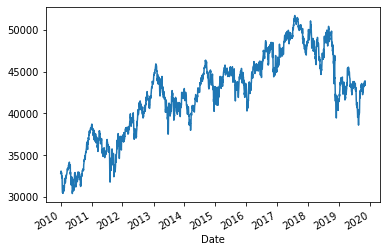

In [9]:
%matplotlib inline
ipc.Close.plot()

In [11]:
#media móvil simple

def MA(df, n):
    MA = pd.Series(pd.Series.rolling(df["Close"], n).mean(), name = "MA_" + str(n))
    df = df.join(MA)
    return df

In [12]:
#series de tiempo
ma_50 = MA(ipc, 50)
ma_200 = MA(ma_50, 200)

In [13]:
ma_200.head()

,High,Low,Open,Close,Volume,Adj Close,MA_50,MA_200
Date,,,,,,,,
2010-01-04,32758.529297,32120.740234,32120.740234,32758.529297,136257800.0,32758.529297,NaN,NaN
2010-01-05,33073.710938,32628.240234,32729.300781,32732.759766,165541900.0,32732.759766,NaN,NaN
2010-01-06,32922.121094,32639.439453,32730.419922,32830.160156,126000100.0,32830.160156,NaN,NaN
2010-01-07,33069.781250,32670.980469,32830.218750,33064.570312,123563200.0,33064.570312,NaN,NaN
2010-01-08,33080.050781,32779.660156,33067.570312,32892.039062,109516900.0,32892.039062,NaN,NaN


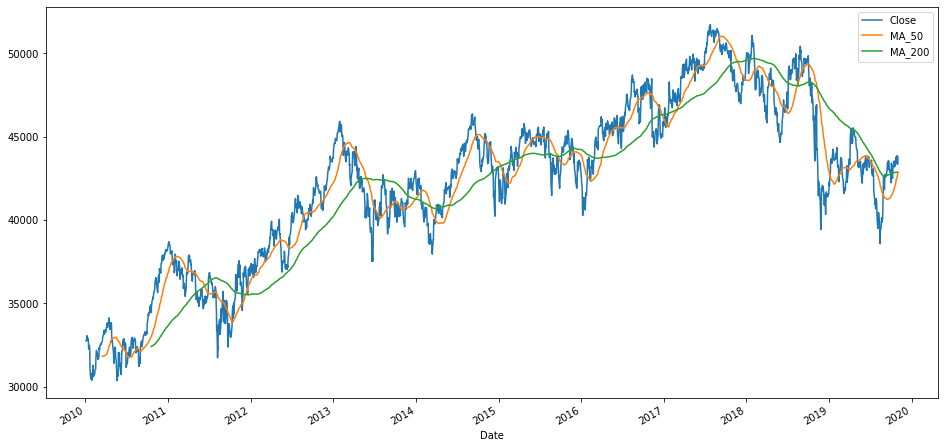

In [15]:
df = ma_200[["Close", "MA_50", "MA_200"]]
df.plot(figsize = (16,8))

In [28]:
#media movil exponencial

def EMA(df, n):
    EMA = pd.Series(pd.Series.ewm(df["Close"], span = n, min_periods = n - 1, adjust = False).mean(), name = "EMA_" + str(n))
    df = df.join(EMA)
    return df

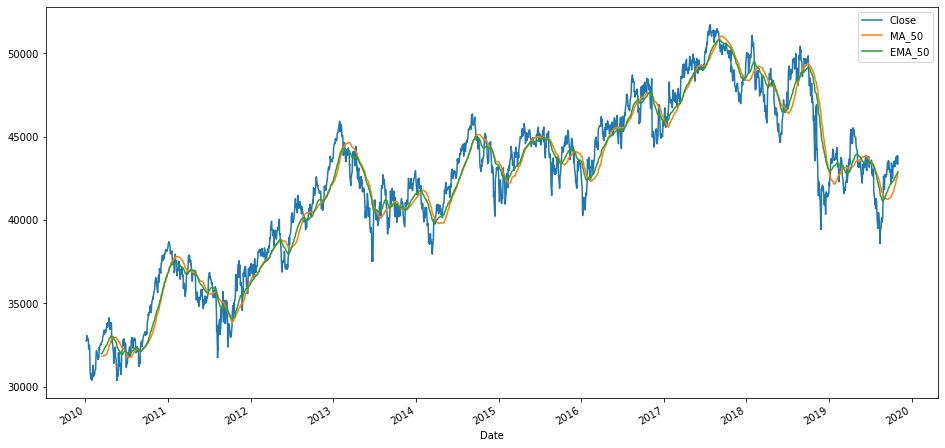

In [30]:
df = EMA(ipc, 50)
df2 = MA(df, 50)
df2 = df2[["Close", "MA_50", "EMA_50"]]
df2.plot(figsize = (16, 8))